In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

# PRACTICEs

In this kernel, you will take your data modeling skills to the next level. You'll learn to implement star and snowflake schemas, recognize the importance of normalization and see how to normalize databases to different extents.

## 1. Star and snowflake schema

### STAR SCHEMA

#### DIMENSIONAL MODELING : STAR SCHEMA

**Fact table**

> Holds record of a metric.
>
> Changes regularly.
>
> Connect to dimensions via foreign keys.

**Dimension table**

> Holds descriptions of attributes
>
> Does not change as often

**Examples**

> Supply books to stores in USA and Canada

> Keep track of the book sales.

### STAR SCHEMA EXAMPLE

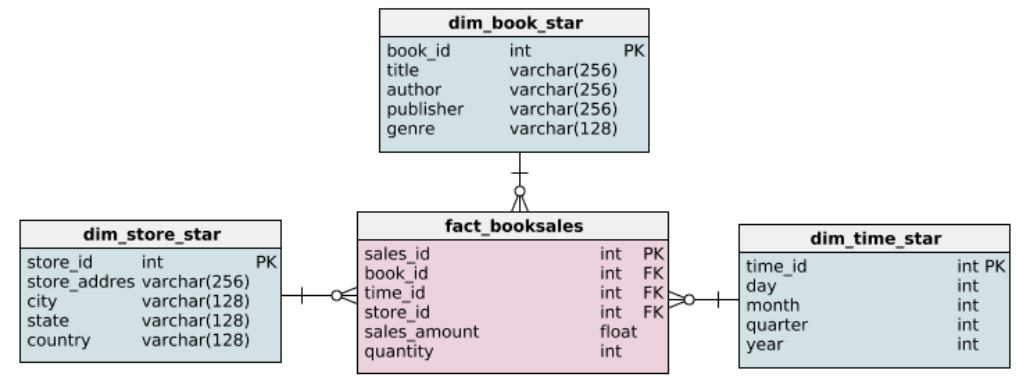

In [2]:
## hidden

### SNOWFLAKE SCHEMA EXAMPLE (an extension of star_schema)

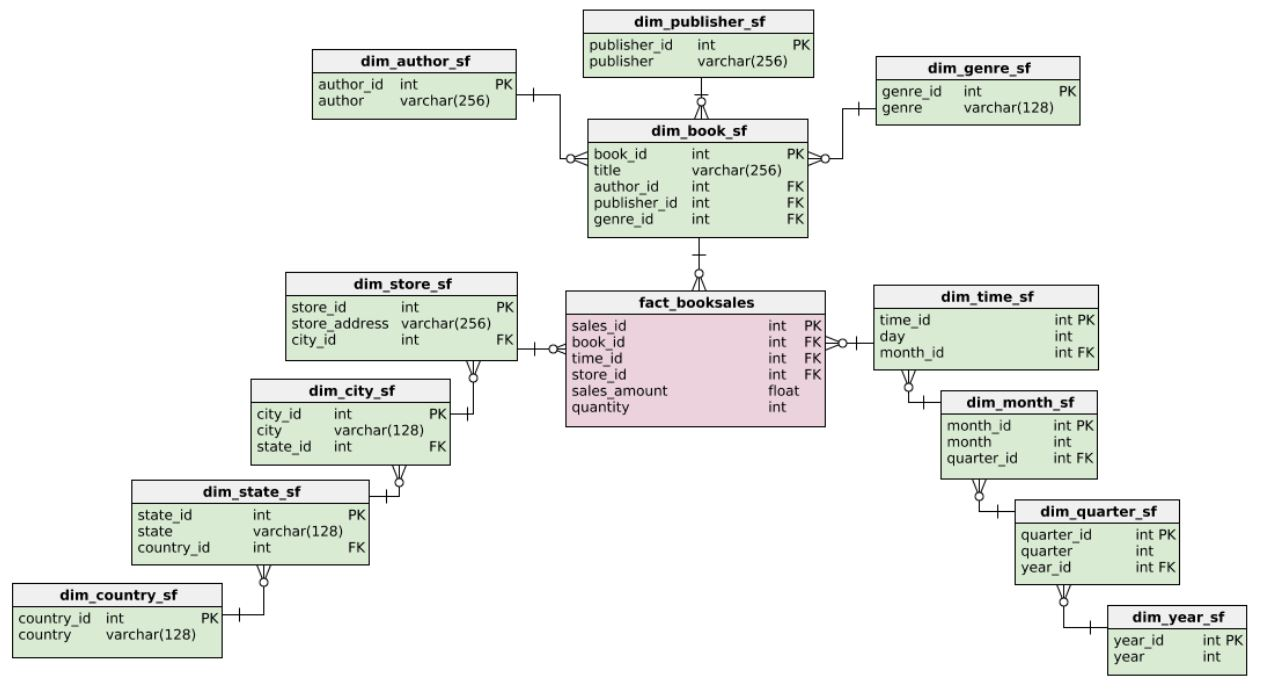

In [3]:
## hidden

#### DISTINGHUISH !
Look at the following image,

**Left (`Star_schema`).** 
> One dimension

**Right (`snowflake schema`).**
> More than one dimension because dimensions are normalized!

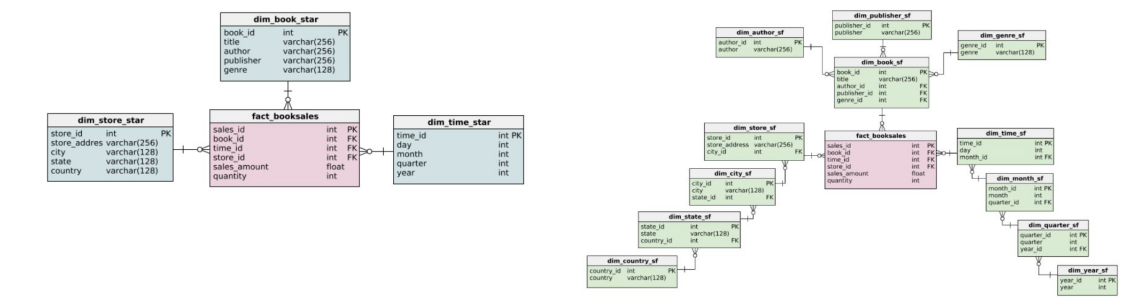

In [21]:
## hidden code

#### What is normalization?
> It is a database design technique
>
> It devides tables into smaller tables and connects them via the relationships
>
> **Goal.** Reduce redundancy & increase the data integrity! Follow that, they identify the repeating group and create the new tables for them.

#### Example. Book dimension star_schema!
Look at the following table `dim_book_star` (from the first image of this kernel); there are many columns can contain the `repeating values`; such as `Author, Publisher` and `Genre.`

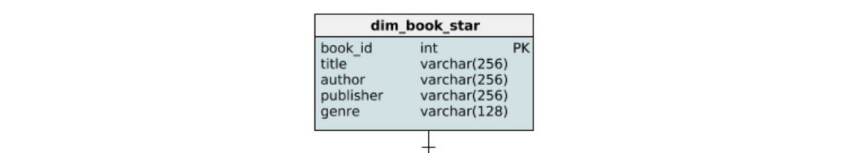

In [5]:
## hidden code

#### Now, we consider the book dimension with the `snowflake_schema`

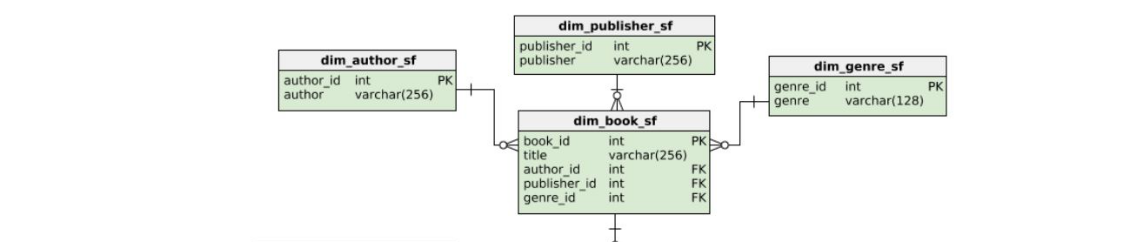

In [6]:
## hidden code

#### Example 3. The store dimension with `star_schema`

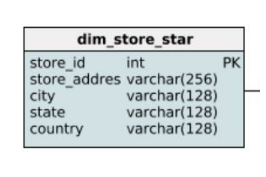

In [7]:
### Columns with repeating values: city, state, country.
## hidden code

#### Store dimension of `snowflake schema`

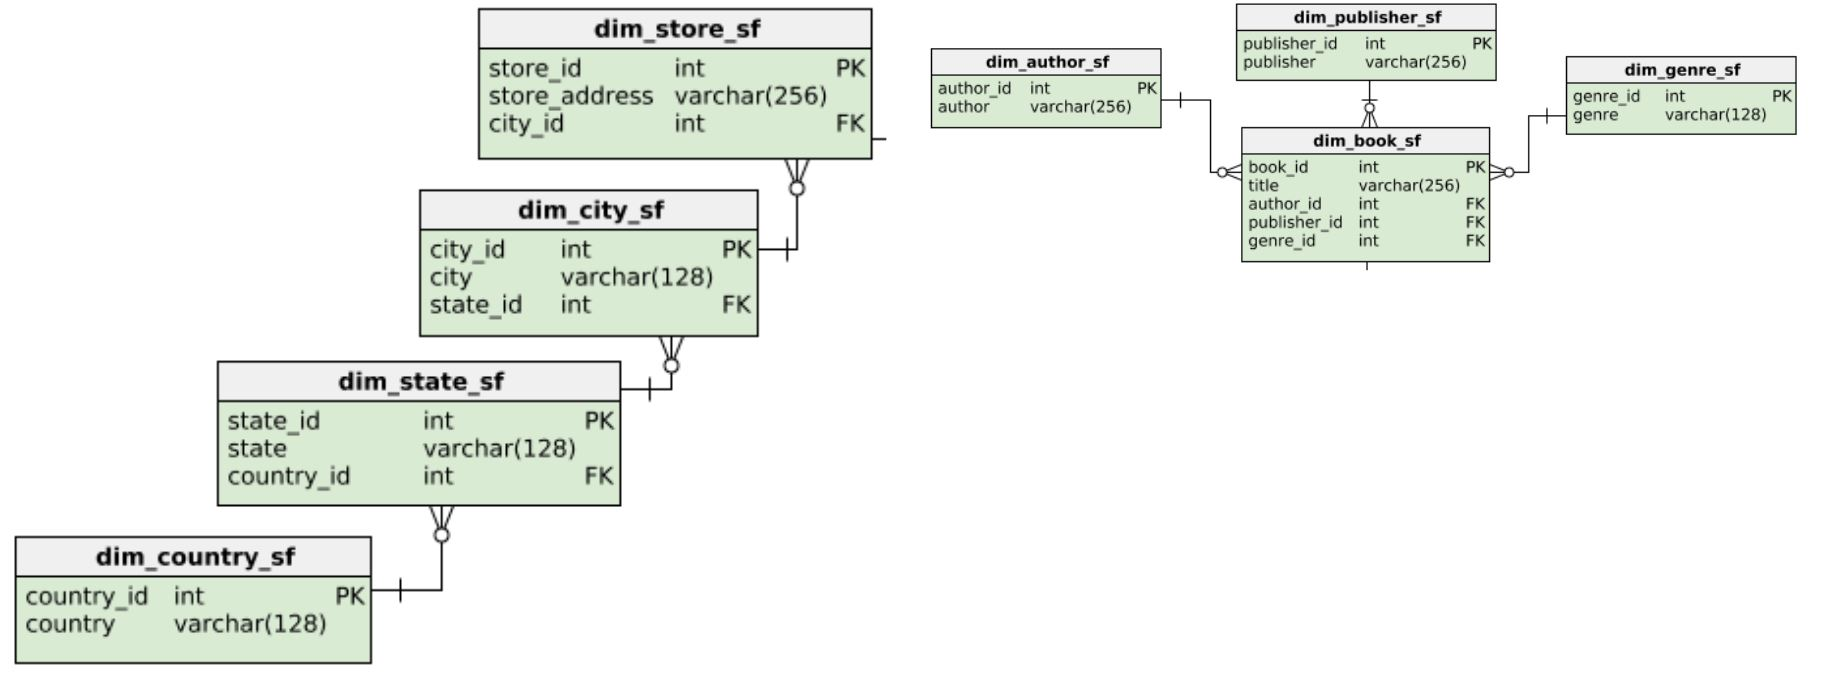

In [8]:
## hidden

#### dim_store with using `star_schema` and `snowflake_schema` comparision!

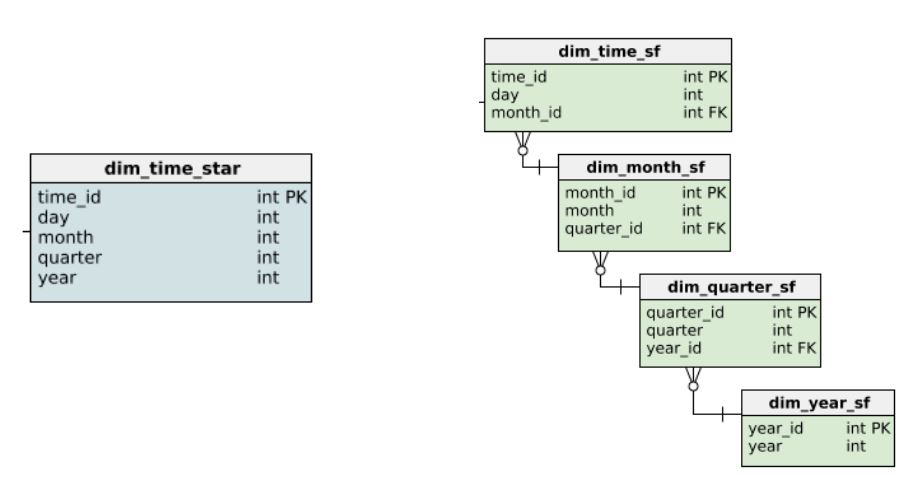

In [9]:
## hidden

### EXERCISEs

#### Exercise 1.1. Running from star to snowflake
Remember your running database from last chapter?

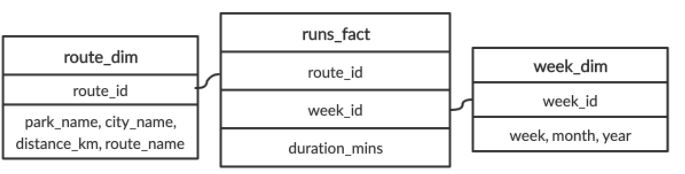

In [10]:
## hidden code

After learning about the snowflake schema, you convert the current star schema into a snowflake schema. To do this, you normalize route_dim and week_dim. 

The tables `runs_fact`, `route_dim`, and `week_dim` have been loaded as follow:

1) **route_dim.**

route_id|park_name|city_name|distance_km|route_name
--------|---------|---------|-----------|-----------
101|Prospect Park|Brooklyn|5|Simple Loop
102|Prospect Park|Brooklyn|10|Grove Run
103|Central Park|New York City|8|Resevoir Loop
104|Central Park|New York City|5|Lake Loop
105|Pennypack Park|Philadelphia|6|Penny Trail
106|Pennypack Park|Philadelphia|12|Penny Trail Extended
107|Liberty State Park|Jersey City|10|Water Front Run


2) **week_dim**

week_id|week|month|year
-------|----|-----|----
601|3|May|2019
602|4|May|2019
603|1|June|2019
604|2|June|2019
605|3|June|2019
606|4|June|2019
607|1|July|2019
608|2|July|2019
609|3|July|2019

3) **runs_fact.**

duration_mins|week_id|route_id
-------------|-------|--------
24.5|601|101
61|601|103
24.5|601|104
24.5|602|104
48|602|102
23|602|101
24.5|603|104
54.96|603|106
38.4|603|103
23.75|603|104
57.6|604|106
31.8|604|105
49|604|107
23.35|604|101
39.2|605|103
27.48|605|105
28.8|605|105
47.5|605|107
24|606|104
53|606|102
24.5|606|101
37.36|606|103
28.8|607|105
23|607|101
49|607|107
45.8|607|107
24|608|101
47.5|608|102
24|608|104
53|608|107
24.5|609|104
37.36|609|103
24.5|609|101


#### Question. Which option best describes the resulting new tables after doing this?

A. `week_dim` is extended two dimensions with new tables for `month` and `year`. `route_dim` is extended one dimension with a new table for `city`.

B. `week_dim` is extended two dimensions with new tables for `month` and `year`. `route_dim` is extended two dimensions with new tables for `city` and `park`.

C. `week_dim` is extended three dimensions with new tables for `week`, `month` and `year`. `route_dim` is extended one dimension with new tables for `city` and `park`.

                                    ===================================================
                                                    Answers & Comments.
                                    ===================================================
*A. Wrong!!* A `park` has multiple routes, so we should have a dimension table for `parks`.

**B. Correct!!!** The columns `month`, `year`, `city`, and `park` are indeed repeated often. `year` and `city` would extend `month` and `park`, respectively.

*C. Wrong!!* If a new dimension table for `week` is created, there will be nothing in `week_dim` but `week_id` and foreign keys.

#### Exercise 1.2. Adding foreign keys
Foreign key references are essential to both the snowflake and star schema. When creating either of these schemas, correctly setting up the foreign keys is vital because they connect dimensions to the fact table. They also enforce a one-to-many relationship, because unless otherwise specified, a foreign key can appear more than once in a table and primary key can appear only once.

The `fact_booksales` table has three foreign keys: `book_id, time_id, and store_id`. 

In this exercise, the four tables that make up the star schema below have been loaded. However, the foreign keys still need to be added. 

#### Instructions
In the constraint called `sales_book`, set `book_id` as a foreign key.

In the constraint called `sales_time`, set `time_id` as a foreign key.

In the constraint called `sales_store`, set `store_id` as a foreign key.

=====================

Now, skimming the first 3 lines in each database before going to slove this exercise!!

> **Database `dim_time_star`**

time_id|day|month|quarter|year
-------|---|-----|-------|----
2000|24|1|1|2017
2001|19|2|1|2017
2002|23|2|1|2018

> **Database `dim_book_star`**

book_id|title|author|publisher|genre
-------|-----|------|---------|-----
5550|Evil Under the Sun|Agatha Christie|Harper Collins|mystery
5551|A Murder is Announced|Agatha Christie|Harper Collins|mystery
5552|4.50 From Paddington|Agatha Christie|Harper Collins|mystery

> **Database `fact_booksales`**

sales_id|book_id|store_id|time_id|sales_amount|quantity
--------|-------|--------|-------|------------|--------
88|5582|829|3951|5405.4|2340
89|5611|804|2445|6177.6|2080
90|5622|820|2083|2059.2|780

> **Database `dim_store_star`** 

store_id|store_address|city|state|country
--------|-------------|----|-----|-------
798|23 Jeanne Ave|Montreal|Quebec|Canada
799|56 University St|Quebec City|Quebec|Canada
800|23 Verte Ave|Montreal|Quebec|Canada

**SOLUTION.**

            -- Add the book_id foreign key
            ALTER TABLE fact_booksales ADD CONSTRAINT sales_book
                FOREIGN KEY (book_id) REFERENCES dim_book_star (book_id);

            -- Add the time_id foreign key
            ALTER TABLE fact_booksales ADD CONSTRAINT sales_time
                FOREIGN KEY (time_id) REFERENCES dim_time_star (time_id);

            -- Add the store_id foreign key
            ALTER TABLE fact_booksales ADD CONSTRAINT sales_store
                FOREIGN KEY (store_id) REFERENCES dim_store_star(store_id);

The `foreign keys` have been added so now we can ensure data consistency whenever new data is inserted to the database.

#### Exercise 1.3. Extending the book dimension
In this section, we saw how the `book dimension` differed between the `star` and `snowflake schema`. 

The `star schema's dimension` table for `books`, `dim_book_star`, has been loaded and below is the snowflake schema of the book dimension. 

book_id|title|author|publisher|genre
-------|-----|------|---------|-----
5550|Evil Under the Sun|Agatha Christie|Harper Collins|mystery
5551|A Murder is Announced|Agatha Christie|Harper Collins|mystery
5552|4.50 From Paddington|Agatha Christie|Harper Collins|mystery

In this exercise, you are going to extend the `star schema` to meet part of the `snowflake schema's criteria`. Specifically, you will create `dim_author` from the data provided in `dim_book_star`.
#### Instructions.
**Step 1.** Create `dim_author` with a column for `author`. Then insert all the distinct authors from `dim_book_star` into `dim_author`. 

**SOLUTION.**   

                -- Create dim_author with an author column
                CREATE TABLE dim_author (
                    author varchar(256)  NOT NULL
                );

                -- Insert authors into the new table
                INSERT INTO dim_author
                SELECT DISTINCT author FROM dim_book_star;

**Step 2.** Alter `dim_author` to have a primary key called `author_id`. Then print out all the columns of `dim_author`.

**SOLUTION.**

                    -- Create a new table for dim_author with an author column
                    CREATE TABLE dim_author (
                        author varchar(256)  NOT NULL
                    );

                    -- Insert authors 
                    INSERT INTO dim_author
                    SELECT DISTINCT author FROM dim_book_star;

                    -- Add a primary key 
                    ALTER TABLE dim_author ADD COLUMN author_id SERIAL PRIMARY KEY;

                    -- Output the new table
                    SELECT * FROM dim_author;
**query result.**

author|author_id
------|---------
F. Scott Fitzgerald|1
Barack Obama|2
Agatha Christie|3
Steven D. Levitt|4
J.R.R. Tolkien|5
Aldous Huxley|6
George R.R. Martin|7
Dan Brown|8
David Foster Wallace|9
Octavia E. Butler|10
Beverly Cleary|11
Alice Waters|12
Alice Walker|13
James Patterson|14
H.G. Wells|15
Isaac Asimov|16
Cecily von Ziegesar|17
Stephenie Meyer|18

You've created a dimension table that succesfully meets the schema criteria - it has all the authors with no repeats and unique `author_ids`. If we were to continue completing the star schema, we would need to create tables for the other dimensions using similar code.

## 2. Normalized and denormalized databases
First, look back the image third image in this kernel,


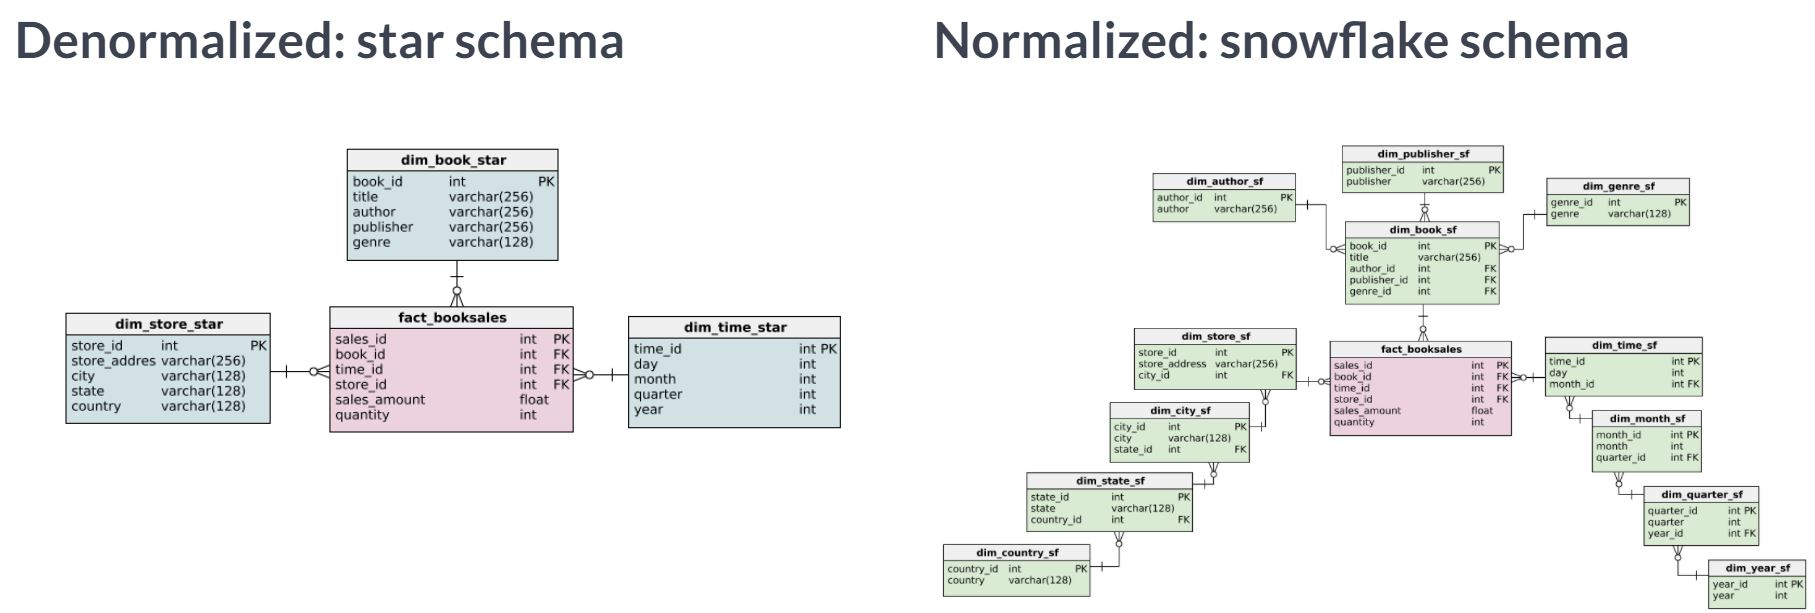

In [11]:
## hidden

### 2.1. Denormalized query!
#### Example

**Goal** get quantity of all `Octavia E. Bulter` books sold in Vancouver in Q4 of 2018.

**SOLUTION.** The database `fact_booksales` has been mentioned in `Exercise 1.2` in this kernel!

            SELECT SUM(quantity) FROM fact_booksales
                INNER JOIN dim_store_star
                    ON dim_store_star.store_id = fact_booksales.store_id
                INNER JOIN dim_book_star
                    ON dim_book_star.book_id = fact_booksales.book_id
                INNER JOIN dim_time_star
                    ON dim_time_star.time_id = fact_boolsales.time_id
            WHERE (dim_store_star.city = 'Vancouver') AND (dim_book_star.author = 'Octavia E. Bulter')
                   AND (dim_time_star.year = 2018) AND (dim_time_star.quarter = 4);
**query result.**

| sum |
|-----|
| 7600|

==> This query need total of 3 joins.

### 2.2. Normalized query!
**SOLUTION.** Now look back the `snowflake_schema`

    SELECT SUM (fact_booksales.quantity) 
    FROM fact_booksales
        -- Join to get city
        INNER JOIN dim_store_sf ON fact_booksales.store_id = dim_store_sf.store_id
        INNER JOIN dim_city ON dim_store_sf.city_id = dim_city_sf.city_id

        -- To get author
        INNER JOIN dim_book_sf ON fact_booksales.book_id = dim_book_sf.book_id
        INNER JOIN dim_author_sf ON dim_book_sf.author_id = dim_author_sf.author_id
        
        -- Get times: year & quarter
        INNER JOIN dim_time_sf ON fact_booksales.year_id = dim_time_sf.time_id
        INNER JOIN dim_month_sf ON dim_time_sf.month_id = dim_month_sf.month_id
        
        INNER JOIN dim_quarter_sf ON dim_month_sd.quarter_id = dim_quarter_sf.quarter_id
        INNER JOIN dim_year_sf ON dim_quarter_sf.year_id = dim_year_sf.year_id
    WHERE (dim_city_sf.city = 'Vancouver') AND (dim_author_sd.author = 'Octavia E. Bulter') 
          AND (dim_year_sf.year = 2018) AND (dim_quarter_sf.quarter = 4);
          
**query result.**

| sum  |
|------|
| 7600 |

==> Using `Normalized query` need total of 8 queries, so **why would we want to normalize a database?**

**1) Because Normalization saves spaces**

Again, look back the database `dim_store_star`,

store_id|store_address|city|state|country
--|-------------|----|-----|-------
1|67 First St|Brooklyn|New York|USA
2|12 Jefferson Rd|San Francisco|California|USA
3|90 Coolidge St|Los Angles|California|USA
4|85 Main Ave|San Francisco|New York|USA
5|123 Belford St|Brooklyn|New York|USA


Look at the values `San Francisco, California`; the **`denormalized database`** enable **data redundancy** while the **`normalization`** elimniate this (see the figure below)!

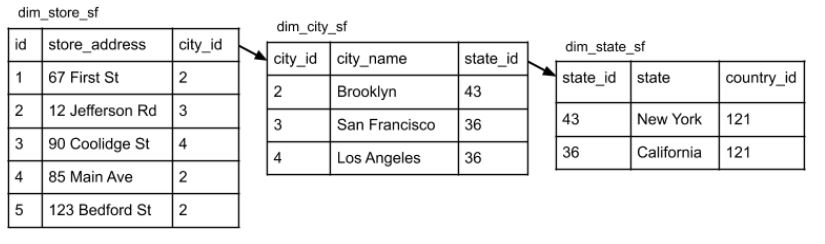

In [12]:
## hidden

#### 2) Normalization ensures better `data_integrity`
Because
> (i) **Enforce data consistency.** For example, they must respect naming conventions because the referential integrity; e.g `California` **not** `CA` or `california`.

> (ii) **Safer updating, removing & inserting.** Since the less data redundancy, the less records to alter!

> (iii) **Easier to design by extending.** Smaller table are easier to extend than the larger table!

                            ============================================
                                    SUMMARY ON NORMALIZATION QUERY
                            ============================================
#### ADVANTAGEs.
- Normalization eliminates the data redundancy ==> save on storage
- The better data integrity: accurate & consistent data.

#### DISADVANTAGEs.
- Takes more queries and complex structure; requires more CPUs hence, take more time to process!


             ==========================================================================
                            |        QUICK REMINDER ON OLTP & OLAP     |
                            ============================================
                            
                |************************************|******************************************|
                |               OLTP                 |                   OLAP                   |
                |-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-|
                | E.g.  Operational database         |   E.g. Data warehouse                    |
                | Typically highly normalized        |   Typically less normalized              |
                |     - Write intensitive            |            - Read intensitive            |
                |     - Prioritize quicker & safer   |            - Prioritize quicker queries  |
                | insertion of data.                 |   for analytic.                          |
                |-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-|

### EXERCISEs

#### Exercise 2.1. Querying the star schema
The novel genre hasn't been selling as well as your company predicted. To help remedy this, you've been tasked to run some analytics on the novel genre to find which areas the Sales team should target. To begin, you want to look at the total amount of sales made in each state from books in the novel genre.

Luckily, you've just finished setting up a data warehouse with the defined star schema as the first image in this kernel.

#### Instructions
Select `state` from the appropriate table and the total `sales_amount`.

Conditionally select for books with the `genre novel`.

Group the results by `state`.

**SOLUTION.**

                SELECT dim_store_star.state, SUM(sales_amount)
                FROM fact_booksales
                    -- Join to get book information
                    JOIN dim_book_star on dim_book_star.book_id = fact_booksales.book_id
                    -- Join to get store information
                    JOIN dim_store_star on dim_store_star.store_id = fact_booksales.store_id
                -- Get all books with in the novel genre
                WHERE dim_book_star.genre = 'novel'
                -- Group results by state
                GROUP BY dim_store_star.state;
**query result.**

state|sum
-----|---
Florida|295594.2
Vermont|216282
Louisiana|176979
New York|248529.6
New Jersey|272956.2
British Columbia|374629.2
Ontario|402263.4
Massachusetts|344671.8
Michigan|82011.6
Washington|272177.4
Utah|128812.2
California|583248.6
Texas|317730.6
Quebec|372134.4

We now have a nice list of the amount of money made from `novels` in each `state`. Note that it took only two joins to run this `query`.

#### Exercise 2.2. Querying the snowflake schema
Imagine that you didn't have the data warehouse set up. Instead, you'll have to run this query on the company's operational database, which means you'll have to rewrite the previous query with the `snowflake schema` as in the second image of this kernel (chapter 1).

Remember, our goal is to find the amount of money made from the novel `genre` in each `state`.

#### Instructions
Select `state` from the appropriate table and the total `sales_amount`.

Conditionally select for `books` with the `genre` novel. Then group the results by `state`.

**SOLUTION.**

            SELECT dim_state_sf.state, SUM(sales_amount)
            FROM fact_booksales
                -- Joins for genre
                JOIN dim_book_sf on fact_booksales.book_id = dim_book_sf.book_id
                JOIN dim_genre_sf on dim_book_sf.genre_id = dim_genre_sf.genre_id
                -- Joins for state 
                JOIN dim_store_sf on dim_store_sf.store_id = fact_booksales.store_id 
                JOIN dim_city_sf on dim_city_sf.city_id = dim_store_sf.city_id
                JOIN dim_state_sf on  dim_state_sf.state_id = dim_city_sf.state_id
            -- Get all books with in the novel genre and group the results by state
            WHERE  dim_genre_sf.genre = 'novel'
            GROUP BY dim_state_sf.state;
**query result.**

state|sum
-----|---
British Columbia|374629.2
California|583248.6
Florida|295594.2
Louisiana|176979
Massachusetts|344671.8
Michigan|82011.6
New Jersey|272956.2
New York|248529.6
Ontario|402263.4
Quebec|372134.4
Texas|317730.6
Utah|128812.2
Vermont|216282
Washington|272177.4                                 

This query was definetely more work than the previous one. It wouldn't be practical to have to think about all these joins if you're doing a lot of analytics.

#### Exercise 2.3. Updating countries
Going through the company data, you notice there are some inconsistencies in the store addresses. These probably occurred during data entry, where people fill in fields using different naming conventions. This can be especially seen in the country field, and you decide that countries should be represented by their abbreviations. The only `countries` in the database are Canada and the United States, which should be represented as `USA` and `CA`.

In this exercise, you will compare the records that need to be updated in order to do this task on the **`star and snowflake schema`**. `dim_store_star` and `dim_country_sf` have been loaded.

#### Instructions 
**Step 1.** Print out all the `records` that need to be updated in the `star schema` so that `countries` are represented by their abbreviations.

**SOLUTION.**

                SELECT * FROM dim_store_star
                WHERE country != 'USA' AND state !='CA';
**query result.**

store_id|store_address|city|state|country
--------|-------------|----|-----|------
798|23 Jeanne Ave|Montreal|Quebec|Canada
799|56 University St|Quebec City|Quebec|Canada
800|23 Verte Ave|Montreal|Quebec|Canada
801|33 Smith St|Toronto|Ontario|Canada
802|44 Green Blvd|Toronto|Ontario|Canada
803|55 Hover Lane|Ottawa|Ontario|Canada
804|68 Washington St|Vancouver|British Columbia|Canada
805|52 Kite St|Victoria|British Columbia|Canada
806|912 Main St|Vancouver|British Columbia|Canada
807|67 First Ave|Syracuse|New York|US
810|345 Camp Road|Burlington|Vermont|United States of America
813|908 Fulton St|San Francisco|California|United States of America
818|534 Main St|Portland|Washington|US
819|89 Second Ave|Rochester|New York|United States
822|22 Circle Lane|Waltham|Massachusetts|United States of America
825|3492 Jay St|Fort Lauderdale|Florida|US
827|893 Kite St|New Orleans|Louisiana|United States
829|564 Jefferson Circle|Houston|Texas|US

**Step 2.** How many **records** would *need to be updated* in the **`snowflake schema`**?

A. 18 records

B. 2 records

C. 1 record

D. 0 records

                                    ===================================================
                                                    Answers & Comments.
                                    ===================================================

*A. Incorrect!!* It seems like you are looking at `dim_store_star` table which is not part of the `snowflake schema`.

*B. Wrong!* If you look closely, you'll find that the `United States` is already abbreviated as `USA`.

**C. Correct!!!** Only one record needs to be changed - `Canada` to `CA`. Updating is typically simpler in a snowflake schema because there are less records to update because redundant values are minimized to their own table (e.g., countries have their own table, `dim_country_sf`). **`Snowflake schemas`** are also better at enforcing naming conventions due to referential integrity. Note how there weren't any variations in how `Canada` and `USA` were referred to in the `snowflake schema`.

*D. Wrong!!* There is a `Canada` value that needs to be abbreivated; look at the table!

#### Exercise 2.3. Extending the snowflake schema
The company is thinking about extending their business beyond bookstores in `Canada` and the `US`. Particularly, they want to expand to a new `continent`. In preparation, you decide a continent field is needed when storing the addresses of stores.

Luckily, you have a `snowflake schema` in this scenario. As we discussed in the video, the `snowflake schema` is typically faster to extend while ensuring data consistency. Along with `dim_country_sf`, a table called `dim_continent_sf` has been loaded. 

**`dim_country_sf`**

country_id|country
----------|-------
1|Canada
2|USA

**`dim_continent_sf`**

continent_id |	continent
-------------|-----------
1 | North America

It contains the only continent currently needed, North America, and a primary key. In this exercise, you'll need to extend `dim_country_sf` to reference `dim_continent_sf`.

#### Instructions
Add a `continent_id` column to `dim_country_sf` with a default value of 1. Note that **`NOT NULL DEFAULT(1)`** `constrains` a value from being `null` and `defaults` its value to `1`.

Make that new column a foreign key reference to `dim_continent_sf`'s `continent_id`.

**SOLUTION.**

                    ALTER TABLE dim_country_sf
                    ADD continent_id int NOT NULL DEFAULT(1);

                    -- Add the foreign key constraint
                    ALTER TABLE dim_country_sf ADD CONSTRAINT country_continent
                       FOREIGN KEY (continent_id) REFERENCES dim_continent_sf(continent_id);

                    -- Output updated table
                    SELECT * FROM dim_country_sf;

**query result.**

country_id|country|continent_id
----------|-------|------------
1|Canada|1
2|USA|1

We have successfully extended the `snowflake schema` to have `continents`. That wasn't too bad as it only required altering one table and we can be sure of data consistency. This type of extension is a big benefit of the `snowflake schema`.

## 3. Normal forms

### Reminder on normalization!

Identify a repeating groups of data and create the table for them! 

The goals of `normalization` are to
> Be able to characterize the level of redundancy in the relational schema.

> Provide machenism for transforming schemas in order to remove the redundancy.

Below are some `NF (normal forms)`; ordered from least to most normalized!

| | |
|-|-|
|First normal form (1NF) | Fourth normal form (4NF)|
|Second normal form (2NF) | Essential tupple normal form (ETNF) |
|Third normal form (3NF) | Fifth normal form (5NF) |
|Elementary key normal form (EKNF) | Domain-key normal form (DKNF) |
|Boyce-Codd normal form (BCNF) | Sixth normal form (6NF)

### 1-NF rules.
> Each record must be unique; no duplicate rows
>
> Each cell must hold one value!

For example, following is the **Initial data**

| student_id | student_email | course_completed |
|------------|---------------|------------------|
| 235 | jim@gmail.com | Introduction to Python |
| 455 | marry@yahoo.com | Introduction to SQL, Data Engineering in R |
| 767 | adam@datacamp.com | Deep Learning, Cleaning data |

Then using **1NF**, we obtain

| student_id | student_email |
|------------|---------------|
| 235 | jim@gmail.com |
| 455 | marry@yahoo.com |
| 767 | adam@datacamp.com |

and noting that `each cell must hold one value`

| student_id | course_completed |
|------------|------------------|
| 235 | Introduction to Python |
| 455 | Introduction to SQL |
| 455 | Data Engineering in R |
| 767 | Deep Learning |
| 767 | Cleaning data with R |

### 2NF rules. Must satisfied `1NF rules` and
> If `PK` [(primary key)](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course1:%20Introduction%20to%20Relational%20Databases%20in%20SQL/uniquely-indentify-records-with-key-constraints.ipynb) is one column; then this automatically satisfy the `2NF`,

> If there is a `composite primary key`, then each **`non-key column` must be dependent on all the keys.**

For example, if we have a **initial data** as follow,

| student_id (PK) | course_id (PK) | instructor_id | instructor | completed_progress |
|-|-|-|-|-|
| 235 | 2001 | 560 | Nick Cachedi | .55 | 
| 455 | 2345 | 658 | Ginger Grant | .10 |
| 767 | 6084 | 999 | Chester Ismay | 1.00|

then with **2NF**, we have

| student_id (PK) | course_id (PK) | percent_completed |
|-|-|-|
| 235 | 2001 | .55 | 
| 455 | 2345 | .10 |
| 767 | 6084 | 1.00|

and 

| course_id (PK) | instructor_id | instructor |
|-|-|-|
| 2001 | 560 | Nick Cachedi | 
| 2345 | 658 | Ginger Grant |
| 6084 | 999 | Chester Ismay |


### 3NF rules! Must satifies `2NF` and
***No transitive dependencies*** : `non-key column` can not depend on other `non-key columns`. 

For example, we have the **initial data** as follow

| course_id (PK) | instructor_id | instructor | Tech |
|-|-|-|-|
| 2001 | 560 | Nick Cachedi | Python | 
| 2345 | 658 | Ginger Grant | SQL |
| 6084 | 999 | Chester Ismay | R|

then, using **3NF** we have

| course_id (PK) | instructor | Tech |
|-|-|-|
| 2001 | Nick Cachedi | Python | 
| 2345 | Ginger Grant | SQL |
| 6084 | Chester Ismay | R|

and

| instructor_id | instructor |
|-|-|
| 560 | Nick Cachedi | 
| 658 | Ginger Grant |
| 999 | Chester Ismay |

### DATA ANOMALIES.

What is risked if we dont' normalize enough,
> Firstly, **update anomaly**. **Data inconsistency caused by data redundancy when updating**, for example

| student_id | student_email | enrolled_in | taught_by |
|-|-|-|-|
| 230 | lisa@gmail.com | Cleaning data in R | Nick Cachedi
| 567 | bobby@hotmail.com | Data Visualization in R | Ronald Pearson |
| 520 | jayce@yahoo.com | Introduction to Python | Huge Bowne Anderson |
| 520 | jayce@yahoo.com | Arima model in R | David Stoffer |

>>Then to update the student `520 's email`:

>>> Need to update more than one record, otherwise, there will be inconsistency.
>
>>> User updating needs to know about the redundancy.

> Secondly, **insertion anomaly. Unable to add a record due to the `missing attributes`**. For example,

| student_id | student_email | enrolled_in | taught_by |
|-|-|-|-|
| 230 | lisa@gmail.com | Cleaning data in R | Nick Cachedi
| 567 | bobby@hotmail.com | Data Visualization in R | Ronald Pearson |
| 520 | jayce@yahoo.com | Introduction to Python | Huge Bowne Anderson |
| 520 | jayce@yahoo.com | Arima model in R | David Stoffer |

Then, this case is ***unabe to insert a student who has signed up but not enrolled in any courses!***

> Finally, **deletion anomaly. Deletion of record(s) causes unintentional loss of data.** Look back the previous table again, if we delete the student `230 ' email`; then what happen to the data on `Cleaning data in R`?

================== SUMMARY ON DATA ANOMALIES ==================

> If we don't normalize enought; what risked? **`update (1), insertion (2) & deletion anomaly (3)`**

> The more normalized the database, the less prone it will be to data anomalies

> Don't forget the downsides of normalization! 

### EXERCISEs.

#### Exercise 3.1. Converting to 1NF
In the next three exercises, you'll be working through different tables belonging to a `car rental` company. Your job is to explore different schemas and gradually increase the normalization of these schemas through the different normal forms. At this stage, we're not worried about relocating the data, but rearranging the tables.

A table called `customers` has been loaded below, which holds information about `customers` and the `cars` they have rented. 

customer_id|customer_name|cars_rented|invoice_id|premium_member|salutation
-----------|-------------|-----------|----------|--------------|----------
1453|Kelly Brennan|4KL298| 4534|false| Dr
1454|Tom Nguyen|5PL4YY| 9832|false| Mr
1455|Georgia Kim|5H9OP5, 9PH8GF, 499ERW| 2903, 3490, 1021|true| Ms
1456|Jean Ford|4KL298, 9PH8GF| 7890, 4494|true| Mrs

#### Question 1! Does the customers table meet `1NF criteria`?

A. Yes, all the records are unique.

B. No, because there are multiple values in `cars_rented` and `invoice_id`

C. No, because the `non-key columns` such as don't depend on `customer_id`, the `primary key`.

**Answers & comments!**

*A. Wrong!!*, noting that the **1NF rules** must hold 2 conditions: `unique` and `each columns only contains one values`

**B. Correct!!!!!!** Look at the last 2 lines of the database at the columns `cars_rented` and `invoice_id`; there are the **`multiple values`**

*C. Wrong!!* Because this condition is of the `2NF rules`

**Question 2.** `cars_rented` holds one or more `car_ids` and `invoice_id` holds multiple values. Create a new table to hold individual `car_ids` and `invoice_ids` of the `customer_ids` who've rented those cars.

Drop two columns from customers table to satisfy **`1NF`**

**SOLUTION.**

                -- Create a new table to hold the cars rented by customers
                CREATE TABLE cust_rentals (
                                              customer_id INT NOT NULL,
                                              car_id VARCHAR(128) NULL,
                                              invoice_id VARCHAR(128) NULL
                                            );

                -- Drop column from customers table to satisfy 1NF
                ALTER TABLE customers
                DROP COLUMN cars_rented,
                DROP COLUMN invoice_id;

We now have two tables: 
> `(1) customers` which holds customer information and 

> `(2) cust_rentals` which holds the `car_ids` rented by different `customer_ids`. 

This satisfies **`1NF`**. In a real situation, we would need to fill the new table before dropping any columns.

#### Exercise 2.2. Converting to 2NF
Let's try normalizing a bit more. In the last exercise, you created a table holding `customer_ids` and `car_ids`. This has been expanded upon and the resulting table, **`customer_rentals`**, has been loaded below

customer_id|car_id|start_date|end_date|model|manufacturer|type_car|condition|color
-----------|------|----------|--------|-----|------------|--------|---------|-----
1453|4KL298|2019-01-08|2019-01-10| Golf 2017| Volkswagen| hatchback| fair| blue
1454|5PL4YY|2019-03-18|2019-03-21| Camaro 2019| Chevrolet| convertible| excellent| red
1455|5H9OP5|2019-04-14|2019-04-14| CRV 2018| Honda| SUV| good| grey
1455|5H9OP5|2019-05-02|2019-05-16| CRV 2018| Honda| SUV| good| grey
1455|499ERW|2019-01-12|2019-01-13| CRV 2018| Honda| SUV| excellent| black
1456|4KL298|2019-02-17|2019-02-22| Golf 2017| Volkswagen| hatchback| fair| blue
1456|4KL298|2019-03-05|2019-03-20| Golf 2017| Volkswagen| hatchback| fair| blue

Since you've got **`1NF`** down, it's time for **`2NF`**.

#### Question 1. Why doesn't `customer_rentals` meet `2NF criteria`?
A. Because the `end_date` doesn't depend on all the `primary keys`.

B. Because there can only be at most two `primary keys`.

C. Because there are non-key attributes describing the `car` that only depend on one `primary key`, `car_id`.

**Answers & comments!**

*A. Wrong!!* Because `end_date` depends on the `customer`, the avaiability of the `car`, and when the renting started (e.g., the three `primary keys`).

*B. Incorrect!!* A **`2NF`** table can have more than two keys as long as a certain condition is met : "each **`non-key column` must be dependent on all the keys.**"

**C. Correct!!!!**

**Question 2.** Create a new table for the `non-key columns` that were conflicting with `2NF criteria`.

Drop those non-key columns from `customer_rentals`.

**SOLUTION.**

            -- Create a new table to satisfy 2NF
            CREATE TABLE cars (
              car_id VARCHAR(256) NULL,
              model VARCHAR(128),
              manufacturer VARCHAR(128),
              type_car VARCHAR(128),
              condition VARCHAR(128),
              color VARCHAR(128)
            );

            -- Drop columns in customer_rentals to satisfy 2NF
            ALTER TABLE customer_rentals
            DROP COLUMN start_date,
            DROP COLUMN end_date,
            DROP COLUMN manufacturer,
            DROP COLUMN condition,
            DROP COLUMN color

There we go! `model, manufacturer, type_car, conditions`, and `colors` depend on `car_id`, but are independent of the other two **`primary keys**`**, `customer_id` and `start_date`. 

The `customer` or `start date` cannot change these attributes. Hence, we have put these columns in a new table and dropped them from `customer_rentals`.

#### Exercise 3.3. Converting to 3NF
Last, but not least, we are at **`3NF`**. In the last exercise, you created a table holding `car_ids`s and `car attributes`. This has been expanded upon. 

For example, `car_id` is now a primary key. The resulting table, rental_cars, has been loaded below.

car_id|model|manufacturer|type_car|condition|color
------|-----|------------|--------|---------|----
4KL298| Golf 2017| Volkswagen| hatchback| fair| blue
5PL4YY| Camaro 2019| Chevrolet| convertible| excellent| red
5H9OP5| CRV 2018| Honda| SUV| good| grey
499ERW| CRV 2018| Honda| SUV| excellent| black

**Question 1. Why doesn't rental_cars meet 3NF criteria?**

A. Because there are two columns that depend on the `non-key` column, `model`.

B. Because there are two columns that depend on the `non-key` column, `color`.

C. Because **`2NF criteria`** isn't satisfied.

**Answers & comments!**

**A. Correct!!!**

*B. Wrong!!* The `color` doesn't dictate any of the other columns.

*C. Incorrect!!* Noting that the `2NF rules` is satisfied because `1NF` is satisfied and the `table only has one primary key: "car_id"`.

**Question 2.** Create a new table for the non-key columns that were conflicting with `3NF criteria`.

Drop those non-key columns from `rental_cars`.

**SOLUTION.**

            -- Create a new table to satisfy 3NF
            CREATE TABLE car_model(
              model VARCHAR(128),
              manufacturer VARCHAR(128),
              type_car VARCHAR(128)
            );

            -- Drop columns in rental_cars to satisfy 3NF
            ALTER TABLE rental_cars
            DROP COLUMN condition,
            DROP COLUMN color

Now, We have finished the first three normal forms! 

Can you see how these `3NF` tables help reduce data redundancy and potential data anomalies?

| | |
|-|-|